# **Exercise 5: Time Series Analysis**
**Name: Sancon, Simon B.**

**Name: BSCS-IS-3B**

# **1. Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# **2. Loading Dataset**

In [ ]:
shampoo_data = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv")
shampoo_data_missing = shampoo_data.isnull().sum()
print(shampoo_data_missing)
shampoo_data.head()

Month                                        0
Sales of shampoo over a three year period    0
dtype: int64


,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


# **3. Convert Month to datetime**

In [ ]:
shampoo_data["Month"] = pd.date_range(start="2000-01-01", periods=len(shampoo_data), freq="M")
shampoo_data.set_index("Month", inplace=True)

# **4. Plot the time series**

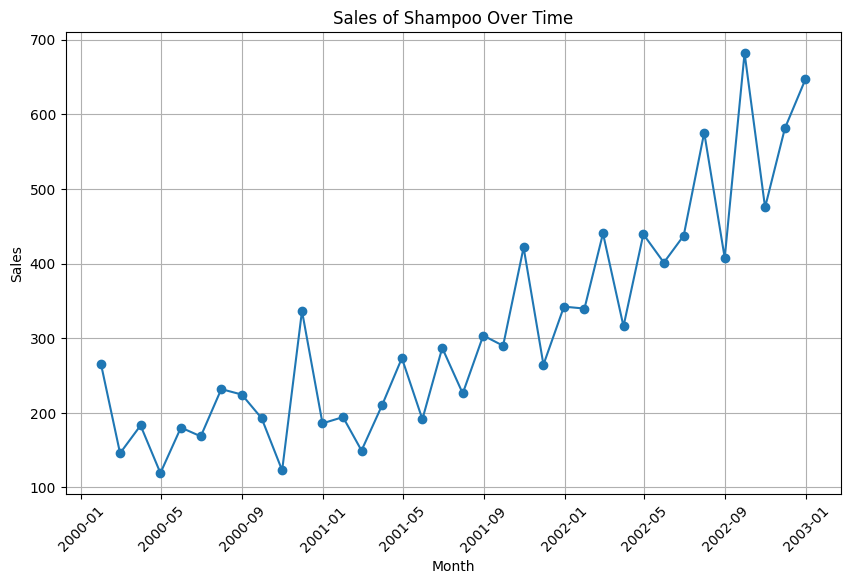

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(shampoo_data.index,shampoo_data["Sales of shampoo over a three year period"],marker = 'o', linestyle = "-")
plt.title("Sales of Shampoo Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# **5. Decomposition**

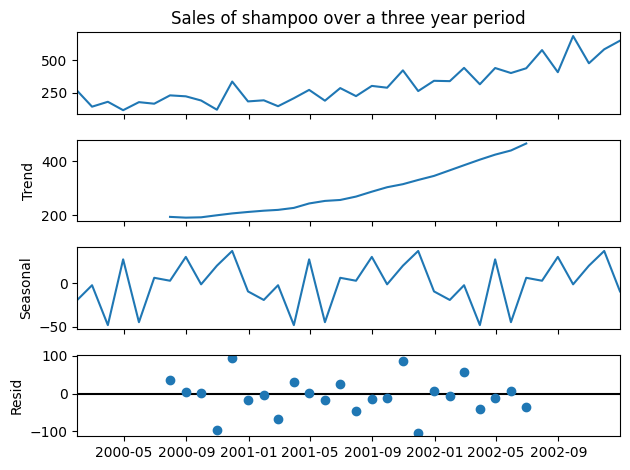

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompostion = seasonal_decompose(shampoo_data["Sales of shampoo over a three year period"], model= "additive")

fig=decompostion.plot()
plt.show()

# **6. Forecasting with Arima**

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(shampoo_data["Sales of shampoo over a three year period"])

print ("ADF Statistic", adf_test[0])
print ("p-value", adf_test[1])

ADF Statistic 3.060142083641181
p-value 1.0


# **7. Fit an Arima Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(shampoo_data["Sales of shampoo over a three year period"],order=(1,1,1))

results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                                       Thu, 28 Mar 2024   AIC                            406.782
Time:                                               06:20:05   BIC                            411.448
Sample:                                           01-31-2000   HQIC                           408.393
                                                - 12-31-2002                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003     

# **8. Forecasting Future Values**

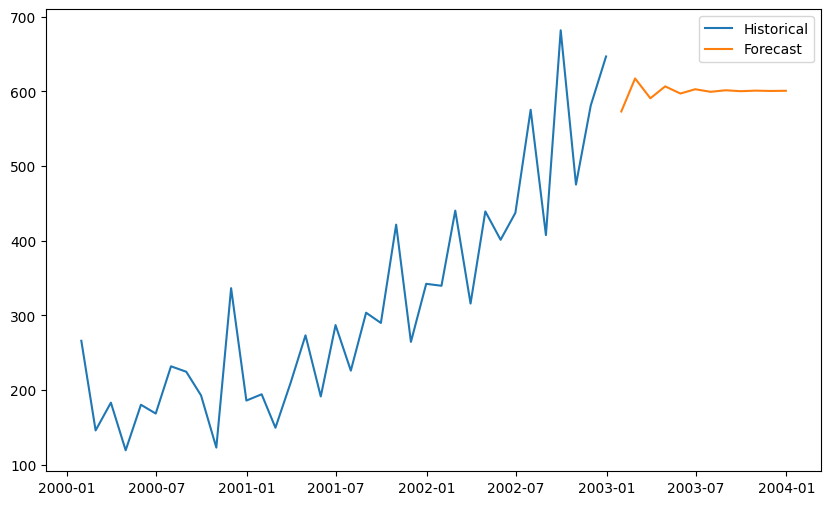

In [ ]:
forecast = results.forecast(steps=12)

plt.figure(figsize=(10,6))
plt.plot(shampoo_data.index,shampoo_data["Sales of shampoo over a three year period"], label= "Historical")
plt.plot(forecast.index, forecast, label= "Forecast")
plt.legend()
plt.show()